# Chapter 3: Demo Logistic Regression - Buy car?
Xây dựng model dự đoán một khách hàng có mua xe hay không dựa trên thông tin về ‘Age’ và ‘EstimatedSalary_K’ (mức lương ước tính – đơn vị tính 1000$)

In [1]:
# Dataset: https://www.kaggle.com/rakeshrau/social-network-ads

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary_K','Purchased'])
data.head()

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                400 non-null    int64
 1   EstimatedSalary_K  400 non-null    int64
 2   Purchased          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
data.describe()

,Age,EstimatedSalary_K,Purchased
count,400.000000,400.00000,400.000000
mean,37.655000,69.74250,0.357500
std,10.482877,34.09696,0.479864
min,18.000000,15.00000,0.000000
25%,29.750000,43.00000,0.000000
50%,37.000000,70.00000,0.000000
75%,46.000000,88.00000,1.000000
max,60.000000,150.00000,1.000000


In [6]:
X = data[['Age','EstimatedSalary_K']]
X.head()

,Age,EstimatedSalary_K
0,19,19
1,35,20
2,26,43
3,27,57
4,19,76


In [7]:
Y = data['Purchased']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [12]:
# Tính toán xác suất của lớp cho tập dữ liệu thử nghiệm 
# bằng cách sử dụng hàm ‘predict_proba’.
# clf.predict_proba(X_test)

In [13]:
print('Train Score: ', model.score(X_train,Y_train))

Train Score:  0.8285714285714286


In [14]:
print('Test Score: ', model.score(X_test,Y_test))

Test Score:  0.875


In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [16]:
Yhat_test = model.predict(X_test)
Yhat_test
# print('Accuracy Score: ', accuracy_score(Y_test,Yhat_test)) Accuracy Score:  0.8833333333333333

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
model.predict_proba(X_test)

array([[8.05311298e-01, 1.94688702e-01],
       [3.67302227e-02, 9.63269777e-01],
       [6.20400061e-01, 3.79599939e-01],
       [2.13261548e-02, 9.78673845e-01],
       [5.90979223e-01, 4.09020777e-01],
       [3.93552385e-01, 6.06447615e-01],
       [8.91455906e-01, 1.08544094e-01],
       [9.62489799e-04, 9.99037510e-01],
       [5.58433625e-01, 4.41566375e-01],
       [7.76099242e-01, 2.23900758e-01],
       [9.01168006e-01, 9.88319941e-02],
       [9.96640189e-01, 3.35981089e-03],
       [8.68157208e-01, 1.31842792e-01],
       [8.33364522e-01, 1.66635478e-01],
       [1.83881916e-02, 9.81611808e-01],
       [8.15541947e-01, 1.84458053e-01],
       [9.95691860e-01, 4.30814013e-03],
       [7.25336218e-01, 2.74663782e-01],
       [6.01615829e-01, 3.98384171e-01],
       [9.16071564e-01, 8.39284357e-02],
       [9.09535419e-01, 9.04645813e-02],
       [3.85417556e-01, 6.14582444e-01],
       [9.94408594e-01, 5.59140611e-03],
       [7.70933843e-02, 9.22906616e-01],
       [5.639537

In [18]:
cm = confusion_matrix(Y_test,Yhat_test)
cm

array([[71,  6],
       [ 9, 34]], dtype=int64)

In [19]:
model.intercept_

array([-13.0845885])

In [20]:
model.coef_

array([[0.24335328, 0.04107724]])

# Trực quan hóa 1

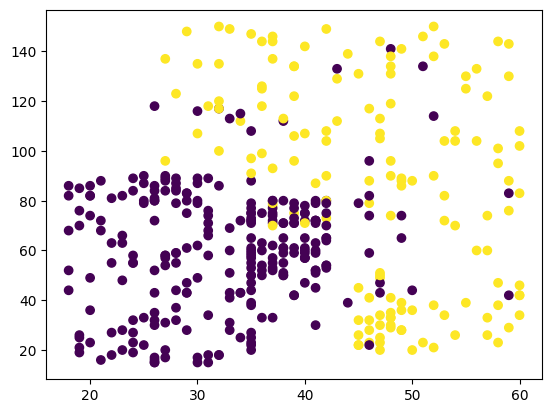

In [21]:
plt.scatter(X['Age'],X['EstimatedSalary_K'],c=Y)

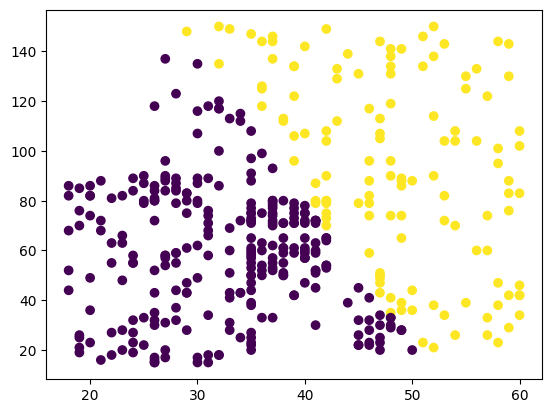

In [22]:
plt.scatter(X['Age'],X['EstimatedSalary_K'],c=model.predict(X))

Text(0.5, 1.0, 'Real Y test')

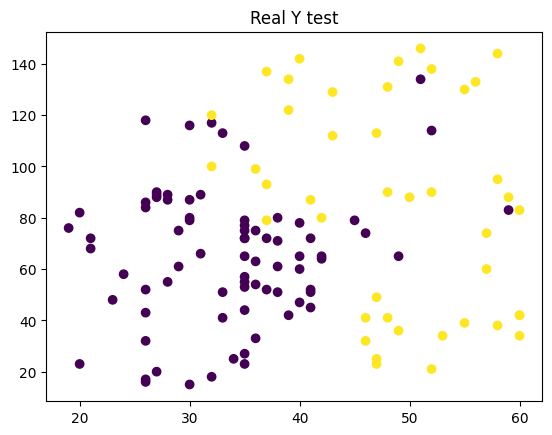

In [24]:
plt.scatter(X_test['Age'],X_test['EstimatedSalary_K'], c=Y_test)
plt.title('Real Y test')

Text(0.5, 1.0, 'Predict Y test')

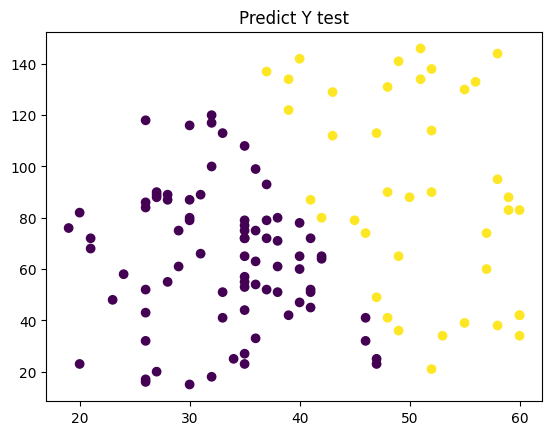

In [25]:
plt.scatter(X_test['Age'],X_test['EstimatedSalary_K'], c=model.predict(X_test))
plt.title('Predict Y test')

# Dự đoán

In [26]:
X_now = [[40,120]]
Y_now = model.predict(X_now)
Y_now

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)